In [725]:
import numpy as np
import pandas as pd 
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon-stats/PokemonDB_with_Stage.csv


# Setup

In [726]:
data = pd.read_csv('../input/pokemon-stats/PokemonDB_with_Stage.csv', header = 0) #read from dataset
data.drop(['#', 'Name', 'Variation', 'Type1', 'Type2'], axis = 1, inplace = True)
data.head() # view first few rows of the data

# Load the Iris dataset as an example
X = data.iloc[:,: -1] # read input columns
y = data.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

# Logistic Regression

In [727]:
lrm = LogisticRegression(multi_class = 'multinomial', max_iter = 1000, solver = "sag", 
                         class_weight = {1:1,2:1,3:1.1})

lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5126050420168067
              precision    recall  f1-score   support

           1       0.52      0.93      0.66       123
           2       0.50      0.09      0.16        85
           3       0.00      0.00      0.00        30

    accuracy                           0.51       238
   macro avg       0.34      0.34      0.27       238
weighted avg       0.45      0.51      0.40       238



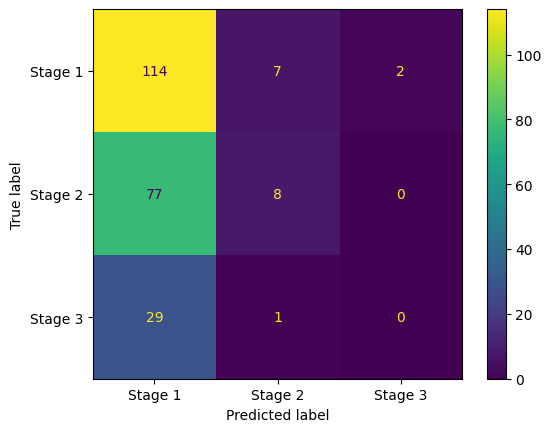

In [728]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Stage 1', 'Stage 2', 'Stage 3']).plot()

# Random Forest

In [729]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7689075630252101
              precision    recall  f1-score   support

           1       0.88      0.81      0.84       123
           2       0.71      0.85      0.77        85
           3       0.50      0.37      0.42        30

    accuracy                           0.77       238
   macro avg       0.69      0.68      0.68       238
weighted avg       0.77      0.77      0.76       238



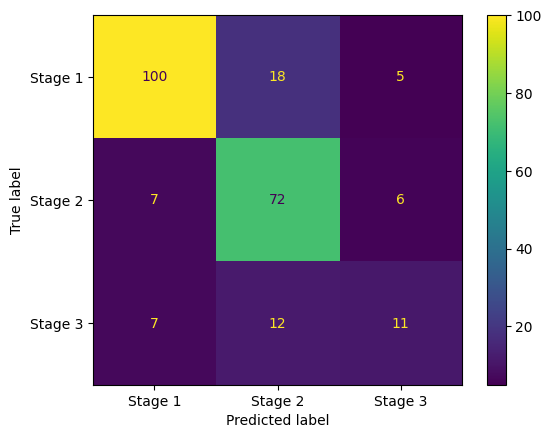

In [730]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Stage 1', 'Stage 2', 'Stage 3']).plot()

# Neural Networks

## Oversampling

Note: MUST comment out Undersampling before using

In [731]:
'''''
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing Pokémon data
# Replace these columns and values with your actual columns and values

# Identify the subset of data corresponding to stage 3 evolution
stage_3_data = data[data['Evolution Stage'] == 3]

# Oversample the minority class (stage 3) to match the majority class
oversampled_stage_3_data = resample(stage_3_data, replace=True, n_samples=len(data[data['Evolution Stage'] == 1]), random_state=42)

# Combine the oversampled stage 3 data with the original data
oversampled_df = pd.concat([data, oversampled_stage_3_data])

# Shuffle the combined dataset to mix the original and oversampled data
oversampled_df = oversampled_df.sample(frac=1, random_state=42)

# Load the Iris dataset as an example
X = oversampled_df.iloc[:,: -1] # read input columns
y = oversampled_df.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
'''''

"''\nfrom sklearn.utils import resample\n\n# Assuming 'df' is your DataFrame containing Pokémon data\n# Replace these columns and values with your actual columns and values\n\n# Identify the subset of data corresponding to stage 3 evolution\nstage_3_data = data[data['Evolution Stage'] == 3]\n\n# Oversample the minority class (stage 3) to match the majority class\noversampled_stage_3_data = resample(stage_3_data, replace=True, n_samples=len(data[data['Evolution Stage'] == 1]), random_state=42)\n\n# Combine the oversampled stage 3 data with the original data\noversampled_df = pd.concat([data, oversampled_stage_3_data])\n\n# Shuffle the combined dataset to mix the original and oversampled data\noversampled_df = oversampled_df.sample(frac=1, random_state=42)\n\n# Load the Iris dataset as an example\nX = oversampled_df.iloc[:,: -1] # read input columns\ny = oversampled_df.iloc[:,-1]\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y,

## Undersampling

Note: MUST comment out Oversampling before using

In [732]:

from sklearn.utils import resample

# Identify the subset of data corresponding to stage 3 evolution
stage_3_data = data[data['Evolution Stage'] == 3]

# Undersample the majority class (stage 1 and 2) to match the minority class
undersampled_majority_data = resample(data[data['Evolution Stage'] != 3], replace=False, n_samples=len(stage_3_data), random_state=42)

# Combine the undersampled majority data with the stage 3 data
undersampled_df = pd.concat([undersampled_majority_data, stage_3_data])

# Shuffle the combined dataset to mix the undersampled majority data and stage 3 data
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

print(undersampled_df)

# Load the Iris dataset as an example
X = undersampled_df.iloc[:,: -1] # read input columns
y = undersampled_df.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


      Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Evolution Stage
537     290   50      80       95       10       45     10                1
843     600   90     100       70      110      150     80                3
803     303   44      38       39       61       79     42                1
209     534   78      84       78      109       85    100                3
1127    515   80      70       65       80      120    100                2
...     ...  ...     ...      ...      ...      ...    ...              ...
305     540  255      10       10       75      135     55                3
472     670  100     150      140      100       90     90                1
135     490   60      50       70       80       80    150                2
949     680  137     137      107      113       89     97                3
73      500   80      82       78       95       80     85                2

[292 rows x 8 columns]


In [733]:
# Assuming y_train is an array of string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Ensure the encoded labels are integers
y_train_encoded = y_train_encoded.astype(int)


model = Sequential([
    Dense(units = 25, activation="relu"),
    Dense(units = 15, activation="relu"),
    Dense(units = 3, activation="softmax")
                ])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = SparseCategoricalCrossentropy()
            )

model.fit(X_train, y_train_encoded, epochs = 10)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 14.8268
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 10.0773
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 6.1647
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 6.6351
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 5.6652
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 5.3826
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 4.8777
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 4.8645
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 4.8680
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 4.3763


In [734]:
yts_pred = tf.nn.softmax(model.predict(X_train))
confusion_matrix = tf.math.confusion_matrix(tf.argmax(yts_pred, axis=1),  y_train_encoded, num_classes=3).numpy()

# print(yts_pred)

print(confusion_matrix)

# cm = confusion_matrix(y_test, yts_pred)
# ConfusionMatrixDisplay(cm, display_labels=['Stage 1', 'Stage 2', 'Stage 3']).plot()

acc = 0
total = 0

for i in range(len(confusion_matrix)):
    acc += confusion_matrix[i][i]
    for j in range(3):
        total += confusion_matrix[i][j]
        
print("Accuracy on test data set: ", (acc/total))

8/8 [==============================] - 0s 2ms/step
[[25  9 27]
 [ 8  7 25]
 [44 23 65]]
Accuracy on test data set:  0.41630901287553645


# Grid Search for Logistic Regression (Work)

In [735]:

logistic_regression_model = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression_model, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
# Train the final model using the best hyperparameters
best_model = LogisticRegression(multi_class = 'ovr', max_iter=1000, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.6101694915254238
